# Capstone Project: Federal Communications Commission (FCC)

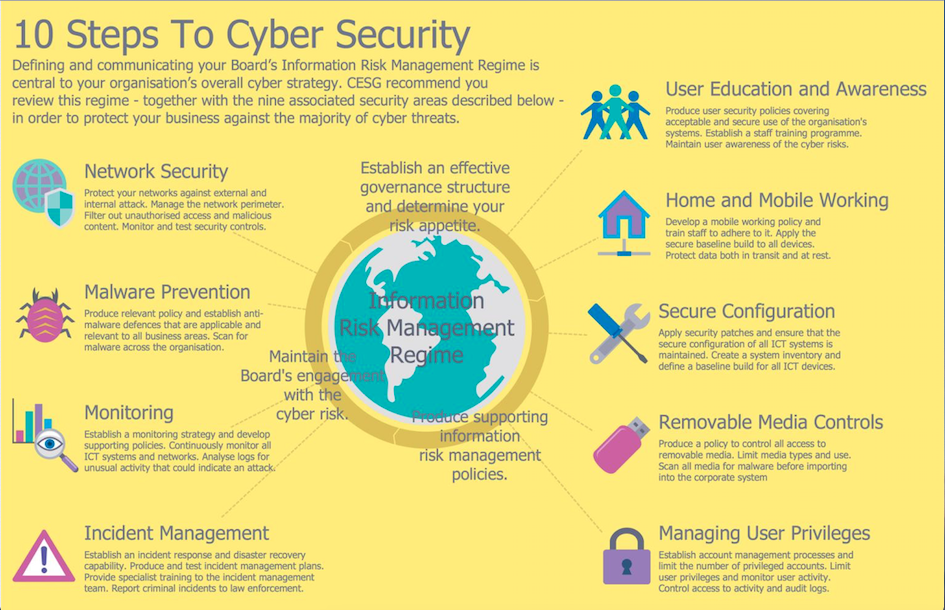

## Prompt:

The CSRIC Best Practices Search Tool allows you to search CSRIC's collection of Best Practices using a variety of criteria including Network Type, Industry Role, Keywords, Priority Levels, and BP Number. The Communications Security, Reliability & Interoperability Council's (CSRIC) mission is to provide recommendations to the FCC to ensure, among other things, optimal security and reliability of communications systems, including telecommunications, media, and public safety. CSRIC’s members focus on a range of public safety and homeland security-related communications matters, including: (1) the reliability and security of communications systems and infrastructure, particularly mobile systems; (2) 911, Enhanced 911 (E911), and Next Generation 911 (NG911); and (3) emergency alerting.

The CSRIC's recommendations will address the prevention and remediation of detrimental cyber events, the development of best practices to improve overall communications reliability, the availability and performance of communications services and emergency alerting during natural disasters, terrorist attacks, cyber security attacks or other events that result in exceptional strain on the communications infrastructure, the rapid restoration of communications services in the event of widespread or major disruptions and the steps communications providers can take to help secure end-users and servers.

## Purpose:
Provide recommendations to the FCC to ensure optimal security & reliability of communication systems in telecommunications, media & public safety.

<details><summary> Useful Links </summary>
 
 - The prompt or any data can be retrieved here:
[Data.gov Website](https://catalog.data.gov/dataset/csric-best-practices)

 - If we want to gather the JSON data:
[JSON Related Data](https://opendata.fcc.gov/api/views/qb45-rw2t/rows.json?accessType=DOWNLOAD)

</details>

What's our target? Classification Problem!

In [1]:
import pandas as pd # Imports Pandas
import numpy as np  # Imports NumPy
import scipy as sp  # Imports SciPy
import seaborn as sns # Imports Seaborn
import matplotlib.pyplot as plt # Imports MatPlotLib
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV # Imports Gridsearch, train/test split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler # Imports standard scalar
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV # Imports Regression Metrics
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Using TensorFlow backend.
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
# Loads in the csv file through the Pandas library & allows us to view it.
fcc_csv = pd.read_csv('./data/CSRIC_Best_Practices.csv')
fcc_csv.head()

,BP Number,Priority,Description,Network Type(s),Industry Role(s),Keywords,Reference,cable,internet/Data,satellite,wireless,wireline,Service Provider,Network Operator,"Priority (1,2,3)",Equipment Supplier,Property Manager,Government,Public Safety
0,11-10-0404,Important,"Service Providers, Network Operators, Public S...",Cable; Internet/Data; Satellite; Wireless; Wir...,Equipment Supplier; Network Operator; Service ...,Hardware; Network Design; Network Elements; Ne...,NaN,True,True,True,True,True,True,True,1,True,False,False,True
1,11-10-0407,Highly Important,Network Operators and Service Providers should...,Cable; Internet/Data; Satellite; Wireless; Wir...,Network Operator; Service Provider;,Industry Cooperation; Network Interoperability...,NaN,True,True,True,True,True,True,True,2,False,False,False,False
2,11-10-0409,Highly Important,Service Providers should use virtual interface...,Internet/Data;,Service Provider;,Network Design; Network Elements;,NaN,False,True,False,False,False,True,False,2,False,False,False,False
3,11-10-0411,Highly Important,"Network Operators, Service Providers, and Publ...",Cable; Internet/Data; Satellite; Wireless; Wir...,Network Operator; Service Provider; Public Saf...,Network Operations; Facilities - Transport;,NaN,True,True,True,True,True,True,True,2,False,False,False,True
4,11-10-0418,Highly Important,"Network Operators, Service Providers, and Publ...",Cable; Internet/Data; Satellite; Wireless; Wir...,Network Operator; Service Provider; Public Saf...,Network Operations; Procedures;,Note: This Best practice could impact 9-1-1 op...,True,True,True,True,True,True,True,2,False,False,False,True


## Exploratory Analysis & Data Cleaning

In [3]:
# Here is a function for basic exploratory data analysis:
def eda(dataframe):
    # Replace any blank spaces w/ a underscore.
    dataframe.columns = dataframe.columns.str.replace(" ", "_")
    # Checks for the null values.
    print("missing values: {}".format(dataframe.isnull().sum().sum()))
    # Checks the data frame range size.
    print("dataframe index: {}".format(dataframe.index))
    # Checks for data types of the columns within the data frame.
    print("dataframe types: {}".format(dataframe.dtypes))
    # Checks the shape of the data frame.
    print("dataframe shape: {}".format(dataframe.shape))
    # Gives us any statistical information of the data frame.
    print("dataframe describe: {}".format(dataframe.describe()))
    # Gives us the duplicated data of the data frame. 
    print("dataframe duplicates: {}".format(dataframe[dataframe.duplicated()].sum()))
    
    # A for loop that does this for every single column & their values within our data frame giving us all 
        # unique values.
    for item in dataframe:
        print(item)
        print(dataframe[item].nunique())

# Let's apply this function to our entire data frame.
eda(fcc_csv)

missing values: 551
dataframe index: RangeIndex(start=0, stop=1016, step=1)
dataframe types: BP_Number             object
Priority              object
Description           object
Network_Type(s)       object
Industry_Role(s)      object
Keywords              object
Reference             object
cable                   bool
internet/Data           bool
satellite               bool
wireless                bool
wireline                bool
Service_Provider        bool
Network_Operator        bool
Priority_(1,2,3)       int64
Equipment_Supplier      bool
Property_Manager        bool
Government            object
Public_Safety           bool
dtype: object
dataframe shape: (1016, 19)
dataframe describe:        Priority_(1,2,3)
count       1016.000000
mean           1.728346
std            0.759196
min            1.000000
25%            1.000000
50%            2.000000
75%            2.000000
max            3.000000
dataframe duplicates: BP_Number             0.0
Priority              0.0
Desc

In [4]:
# Here's a function to convert NaN's in the data set to 'None' for string objects.
# Just pass in the entire data frame.
def convert_str_nan(data):
    return data.astype(object).replace(np.nan, 'None', inplace = True)
convert_str_nan(fcc_csv)

In [5]:
# Here's a function to drop any rows with NaN's in the dataset.
# Just pass in the entire data frame.
def drop_nans(data):
    return data.dropna()
drop_nans(fcc_csv).head()

,BP_Number,Priority,Description,Network_Type(s),Industry_Role(s),Keywords,Reference,cable,internet/Data,satellite,wireless,wireline,Service_Provider,Network_Operator,"Priority_(1,2,3)",Equipment_Supplier,Property_Manager,Government,Public_Safety
4,11-10-0418,Highly Important,"Network Operators, Service Providers, and Publ...",Cable; Internet/Data; Satellite; Wireless; Wir...,Network Operator; Service Provider; Public Saf...,Network Operations; Procedures;,Note: This Best practice could impact 9-1-1 op...,True,True,True,True,True,True,True,2,False,False,False,True
7,11-10-0421,Highly Important,Equipment Suppliers should design network elem...,Cable; Internet/Data; Satellite; Wireless; Wir...,Equipment Supplier; Public Safety;,Hardware; Network Elements; Software;,Common recovery mechanisms could include the f...,True,True,True,True,True,False,False,2,True,False,False,True
8,11-10-0424,Important,Network Operators and Public Safety should whe...,Cable; Internet/Data; Satellite; Wireless; Wir...,Network Operator; Public Safety;,Hardware; Network Elements; Network Provisioning;,"Recognized standards may include UL, NEC, ANSI...",True,True,True,True,True,False,True,1,False,False,False,True
10,11-10-0429,Highly Important,Equipment Suppliers should provide for appropr...,Cable; Internet/Data; Satellite; Wireless; Wir...,Equipment Supplier;,Hardware; Network Elements; Software;,Information useful for diagnostics might inclu...,True,True,True,True,True,False,False,2,True,False,False,False
12,11-10-0431,Highly Important,Equipment Suppliers should provide capacity an...,Cable; Internet/Data; Satellite; Wireless; Wir...,Equipment Supplier;,Network Elements;,Use commonly agreed upon terminologies and met...,True,True,True,True,True,False,False,2,True,False,False,False


In [6]:
# Let's double check that replacing the "NaN" values
fcc_csv.isnull().sum()

BP_Number               0
Priority                0
Description             0
Network_Type(s)         3
Industry_Role(s)        0
Keywords                1
Reference             546
cable                   0
internet/Data           0
satellite               0
wireless                0
wireline                0
Service_Provider        0
Network_Operator        0
Priority_(1,2,3)        0
Equipment_Supplier      0
Property_Manager        0
Government              1
Public_Safety           0
dtype: int64

In [7]:
# Let's double check our changes worked.
fcc_csv.shape

(1016, 19)

In [8]:
# Let's rename the 'Priority_(1,2,3)' column so we can utilize it.
fcc_csv.rename(columns = {
    'Priority_(1,2,3)': 'Priorities'
},
             
inplace = True)
# Let's view the values & how the correspond to the 'Priority' column.
fcc_csv['Priorities'].value_counts()

1    468
2    356
3    192
Name: Priorities, dtype: int64

In [9]:
# We notice that we have an unbalanced classification problem.
# Let's group the "Highly Important" (2) & "Critical" (3) aspects because that's where we can make recommendations.
# Let's double check that it worked.
fcc_csv['Priorities'] = [0 if i == 1 else 1 for i in fcc_csv['Priorities']]
fcc_csv['Priorities'].value_counts()

1    548
0    468
Name: Priorities, dtype: int64

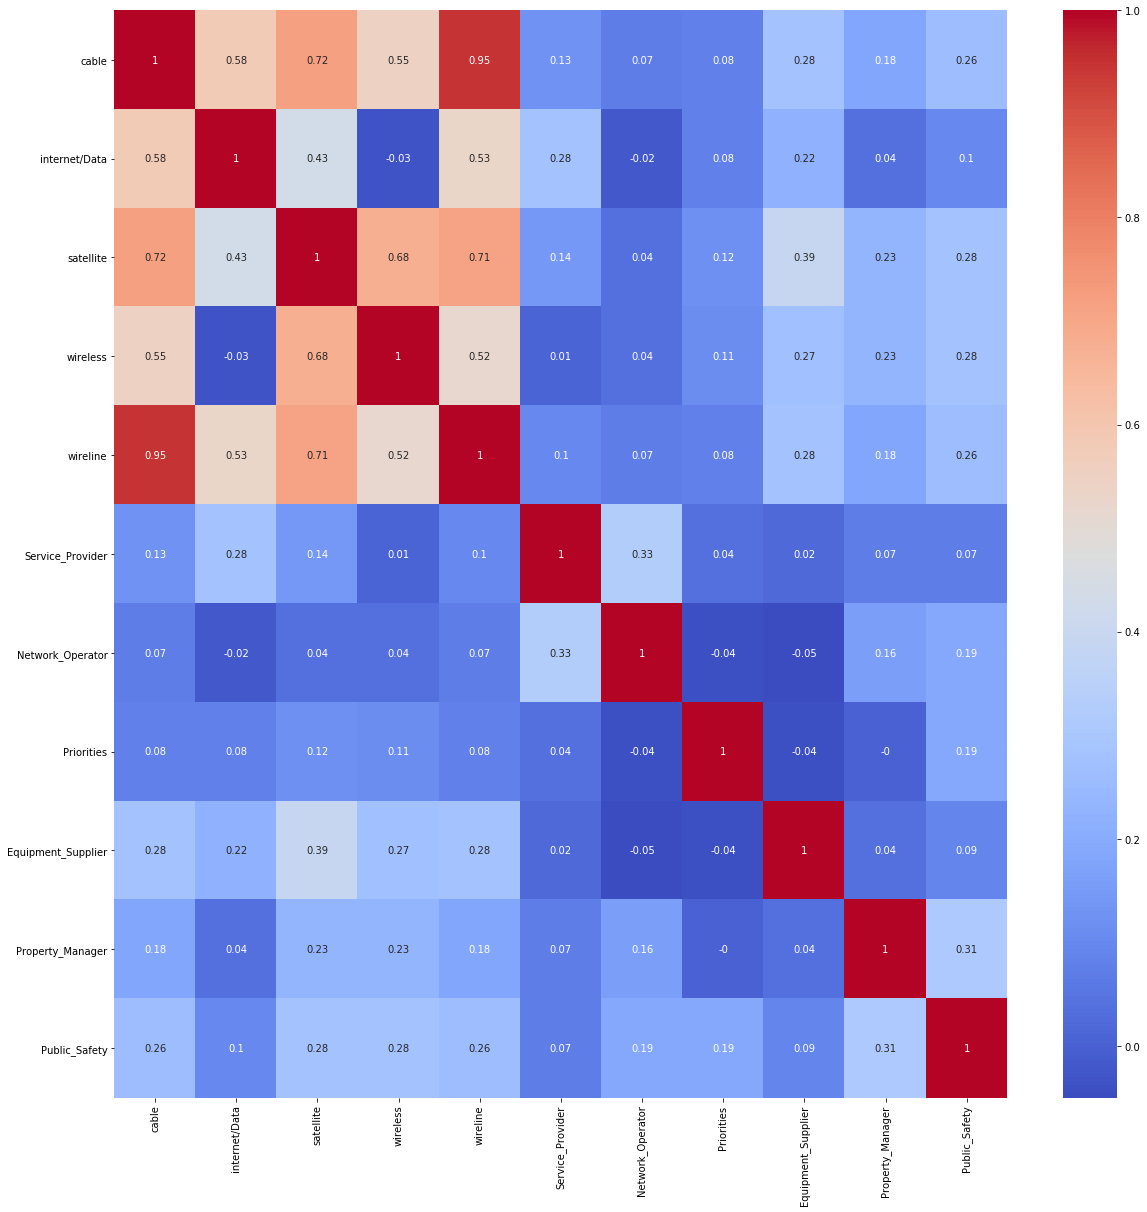

In [10]:
plt.figure(figsize = (20,20))
sns.heatmap(np.round(fcc_csv.corr(), 2), annot = True, cmap = 'coolwarm')

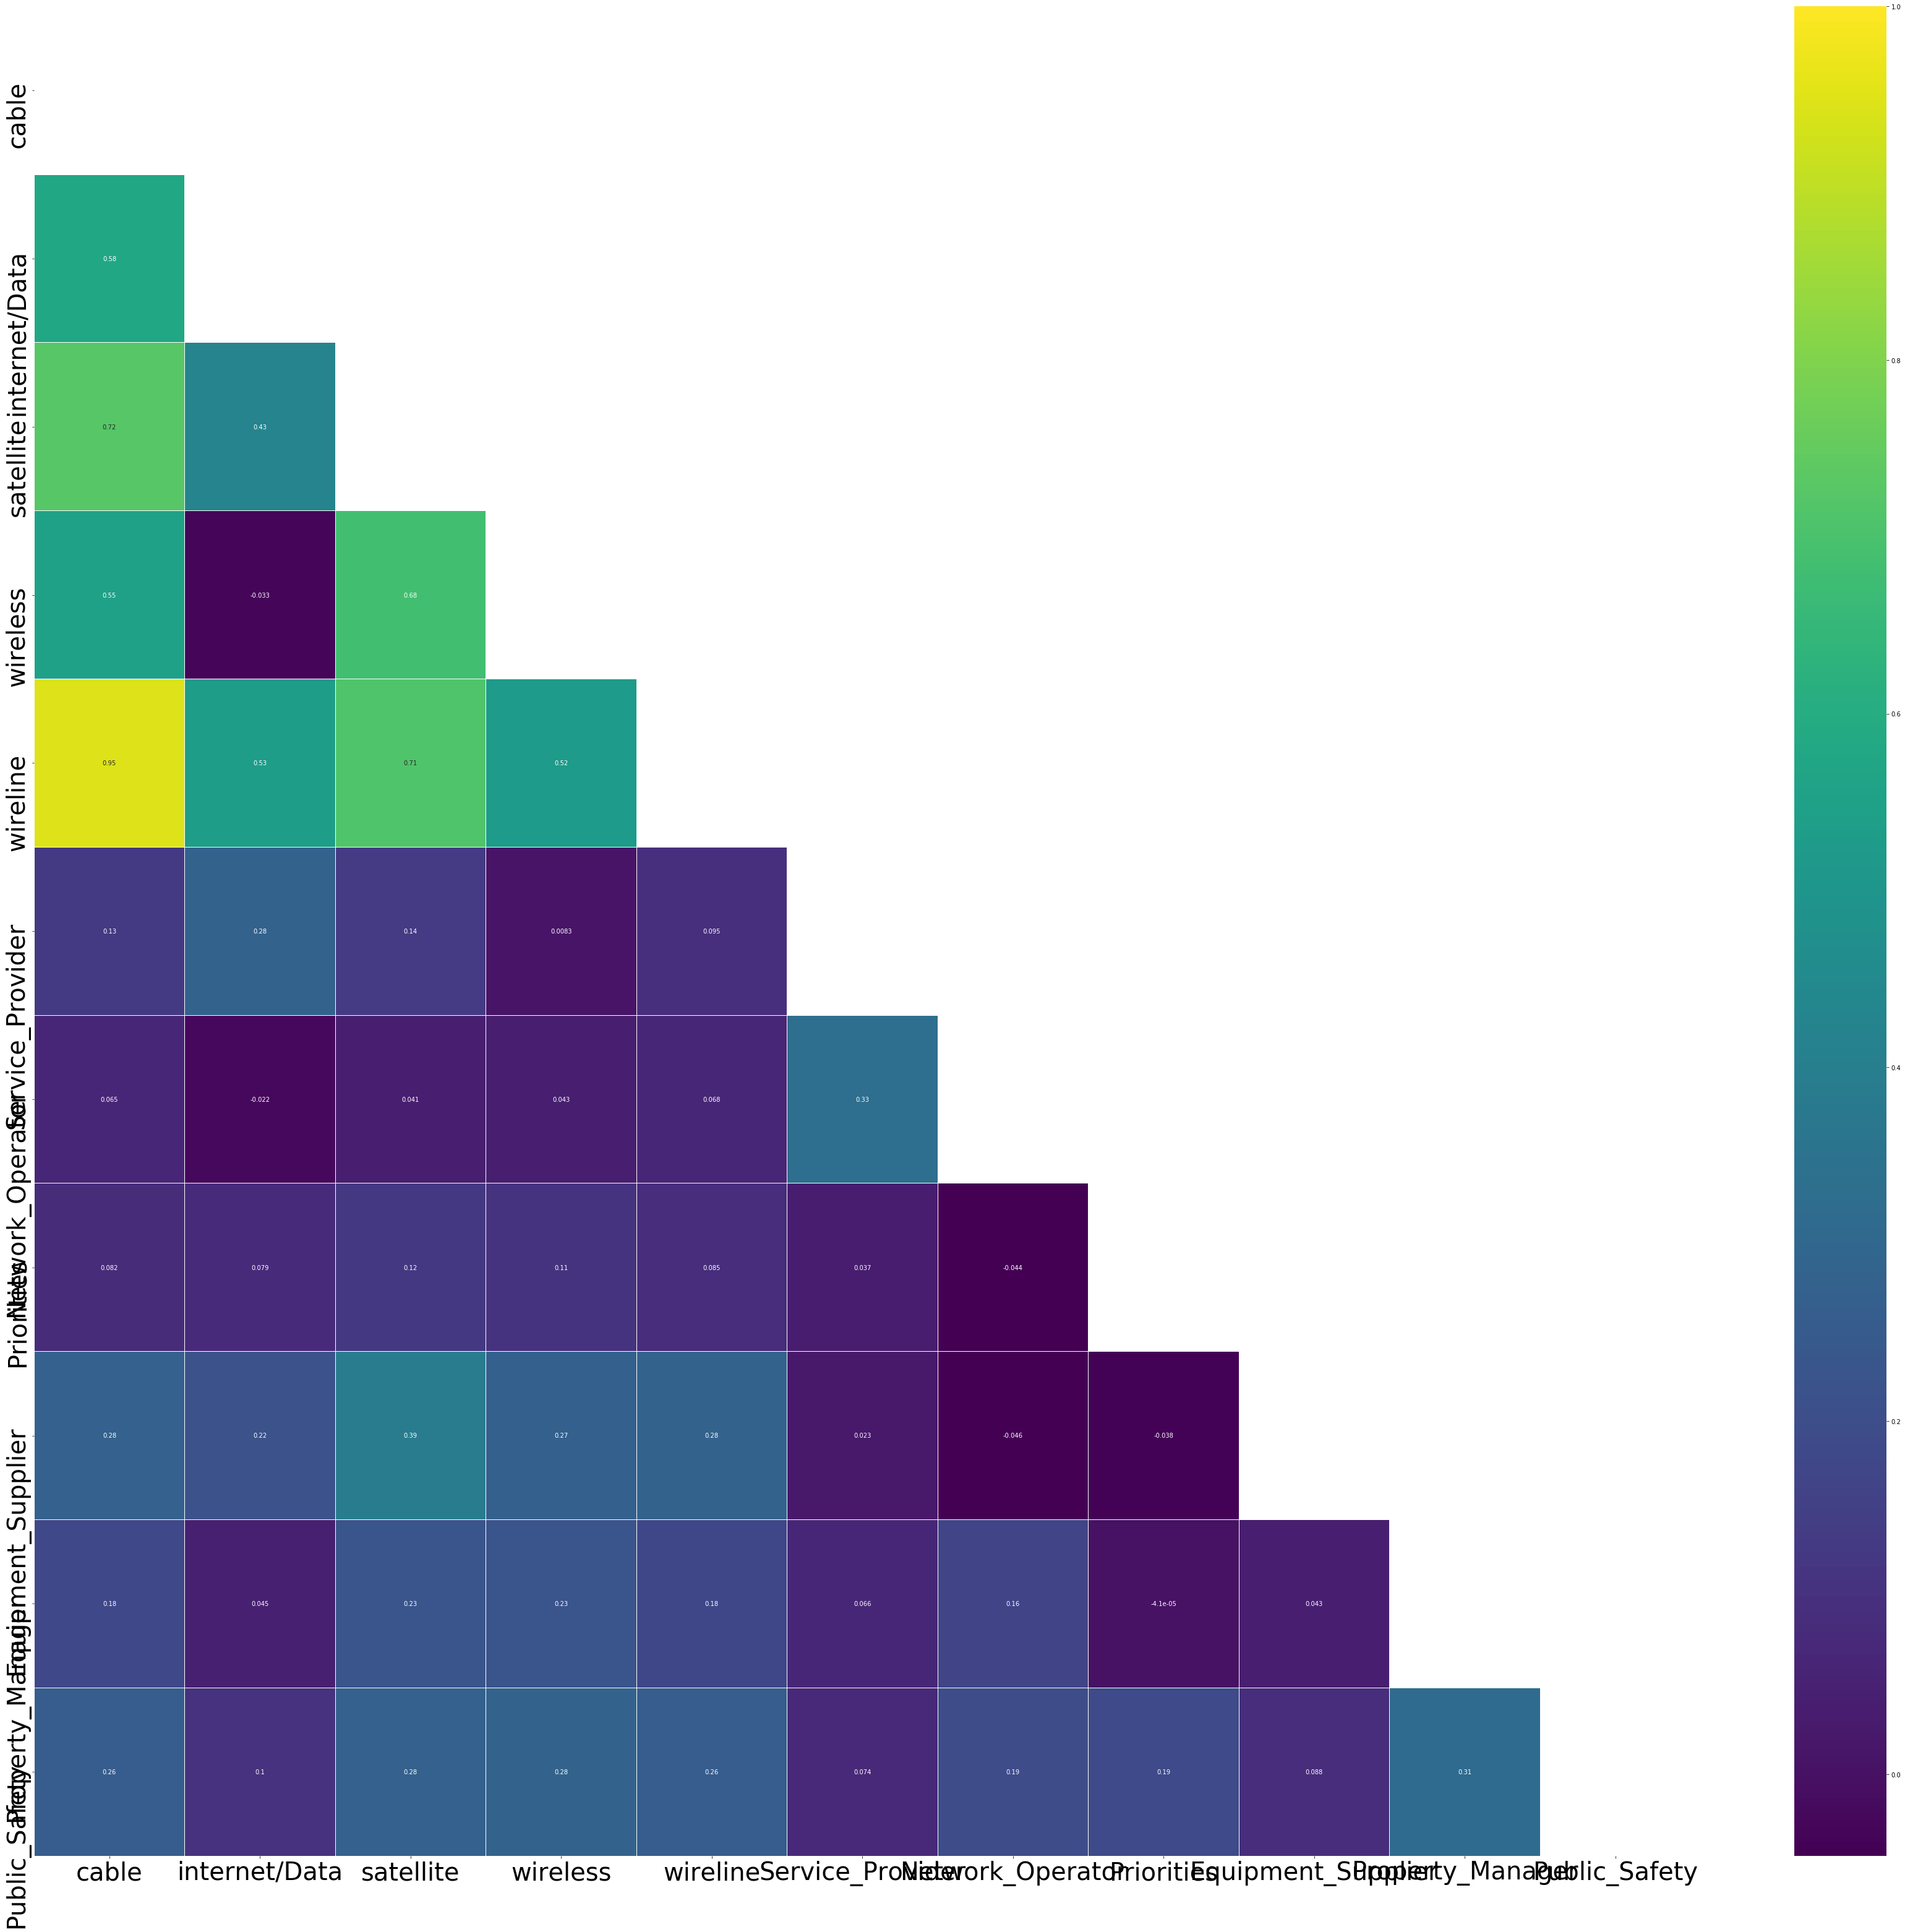

In [11]:
# Plotting correlation on the more strong correlated features.
plt.figure(figsize = (60,55))
mask = np.zeros_like(fcc_csv.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(fcc_csv.corr(), annot = True, cmap = 'viridis', linewidths = .1, mask = mask)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40);

### Understanding the Data

## Modeling

In [12]:
# Let's view the largest negative correlated columns to our "Priorities" column.
largest_neg_corr_list = fcc_csv.corr()[['Priorities']].sort_values('Priorities').head(5).T.columns
largest_neg_corr_list

Index(['Network_Operator', 'Equipment_Supplier', 'Property_Manager',
       'Service_Provider', 'internet/Data'],
      dtype='object')

In [13]:
# Let's view the largest positive correlated columns to our "Priorities" column.
largest_pos_corr_list = fcc_csv.corr()[['Priorities']].sort_values('Priorities').tail(5).T.columns.drop('Priorities')
largest_pos_corr_list

Index(['wireline', 'wireless', 'satellite', 'Public_Safety'], dtype='object')

In [14]:
# Let's pass in every column that is categorical into our X.
# These are the strongest & weakest correlated columns to our "Priorities" variable. 
X = fcc_csv[['Network_Operator', 'Equipment_Supplier', 'Property_Manager', 
             'Service_Provider', 'wireline', 'wireless', 'satellite', 'Public_Safety']]
y = fcc_csv['Priorities'] # Our y is what we want to predict.

In [15]:
# We have to train/test split the data so we can model the data on our training set & test it.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
# Shape of the X data.
X.shape

(1016, 8)

In [17]:
# Shape of the y_train.
y_train.shape

(711,)

In [18]:
# We need to transpose the trains so they contain the same amount of rows.
X = X.transpose()

### Grid Search: Naive Bayes

What is Naive Bayes?

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature

In [19]:
# Instantiates the Naive Bayes classifier.
mnb = MultinomialNB()

In [20]:
params = {'min_samples_split':[12, 25, 40]}

In [21]:
# Grid searches our Naive Bayes.
mnb_grid = {}
gs_mnb = GridSearchCV(mnb, param_grid = mnb_grid, cv = 3)
gs_mnb.fit(X_train, y_train)
gs_mnb.score(X_train, y_train)

0.6216596343178622

In [22]:
# Scores the Naive Bayes.
gs_mnb.score(X_test, y_test)

0.5704918032786885

### Grid Search: Random Forest

What is Random Forest?

Random Forest Classifier is an ensemble algorithm, which creates a set of decision trees from a randomly selected subset of the training set, which then aggregates the votes from different decision trees to decide the final class of the test object. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model's prediction.

In [23]:
# Instantiates the random forest classifier.
rf = RandomForestClassifier(n_estimators = 10)

In [24]:
# Grid searches our random forest classifier.
gs_rf = GridSearchCV(rf, param_grid = params, return_train_score = True, cv = 5)
gs_rf.fit(X_train, y_train)
gs_rf.score(X_train, y_train)

0.6694796061884669

In [25]:
# Our random forest score.
gs_rf.score(X_test, y_test)

0.6131147540983607

In [26]:
# Our best feature importances.
gs_rf.best_estimator_.feature_importances_

array([0.10221294, 0.15800509, 0.09148111, 0.14476379, 0.06860321,
       0.1159917 , 0.11152923, 0.20741293])

### Ada Boost

What is Adaboost?

AdaBoost is short for Adaptive Boosting. It is basically a machine learning algorithm that is used as a classifier. Whenever you have a large amount of data and you want divide it into different categories, we need a good classification algorithm to do it. Hence the word 'boosting', as in it boosts other algorithms!

In [27]:
scores_test = []
scores_train = []
n_estimators = []

for n_est in range(30):
    ada = AdaBoostClassifier(n_estimators = n_est + 1, random_state = 42)
    ada.fit(X_train, y_train)
    n_estimators.append(n_est + 1)
    scores_test.append(ada.score(X_test, y_test))
    scores_train.append(ada.score(X_train, y_train))

In [28]:
# Our Ada Boost score on our train set.
ada.score(X_train, y_train)

0.6090014064697609

In [29]:
# Our Ada Boost score on our test set.
ada.score(X_test, y_test)

0.5639344262295082

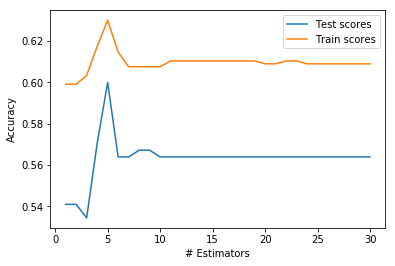

In [30]:
# Graphs the Adaboost Classifier on our train & test data.
plt.plot(n_estimators, scores_test, label = 'Test scores')
plt.plot(n_estimators, scores_train, label = 'Train scores')
plt.xlabel('# Estimators')
plt.ylabel('Accuracy')
plt.legend()

### Gradient Boost

What is Gradient Boost?

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [31]:
# Instaniates a Gradient Boost Model.
scores_test = []
scores_train = []
n_estimators = []

for n_est in range(30):
    grb = GradientBoostingClassifier(n_estimators = n_est + 1, random_state = 42)
    grb.fit(X_train, y_train)
    n_estimators.append(n_est + 1)
    scores_test.append(grb.score(X_test, y_test))
    scores_train.append(grb.score(X_train, y_train))

In [32]:
# Our Gradient Boost Score for our train data.
grb.score(X_train, y_train)

0.6610407876230661

In [33]:
# Our Gradient Boost Score for our test data.
grb.score(X_test, y_test)

0.5737704918032787

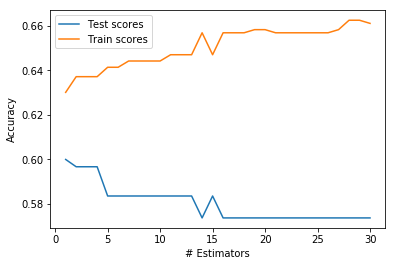

In [34]:
# Graphs the Gradient Boost Classifier on our train & test data.
plt.plot(n_estimators, scores_test, label = 'Test scores')
plt.plot(n_estimators, scores_train, label = 'Train scores')
plt.xlabel('# Estimators')
plt.ylabel('Accuracy')
plt.legend()

### Neural Network

What are neural networks?

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input.

#### Regularization Method 1

In [35]:
model = Sequential()

n_input = X_train.shape[1]

model.add(Dense(18, input_dim = n_input, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(1, activation = 'sigmoid', kernel_regularizer = regularizers.l2(0.01)))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = None)

W0905 00:35:23.357912 4447454656 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 00:35:23.770413 4447454656 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 00:35:23.937834 4447454656 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 00:35:24.102661 4447454656 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0905 00:35:24.123699 4447454656 deprecation_wrapper.py:119] From /anaconda3

Train on 711 samples, validate on 305 samples
Epoch 1/100
711/711 [==============================] - 2s 3ms/step - loss: 0.8837 - acc: 0.5162 - val_loss: 0.8050 - val_acc: 0.5934
Epoch 2/100
711/711 [==============================] - 0s 50us/step - loss: 0.8248 - acc: 0.5162 - val_loss: 0.7878 - val_acc: 0.6197
Epoch 3/100
711/711 [==============================] - 0s 48us/step - loss: 0.8024 - acc: 0.5415 - val_loss: 0.7819 - val_acc: 0.6230
Epoch 4/100
711/711 [==============================] - 0s 48us/step - loss: 0.7901 - acc: 0.5443 - val_loss: 0.7767 - val_acc: 0.5934
Epoch 5/100
711/711 [==============================] - 0s 47us/step - loss: 0.7792 - acc: 0.5837 - val_loss: 0.7673 - val_acc: 0.5967
Epoch 6/100
711/711 [==============================] - 0s 47us/step - loss: 0.7702 - acc: 0.5837 - val_loss: 0.7607 - val_acc: 0.5967
Epoch 7/100
711/711 [==============================] - 0s 51us/step - loss: 0.7615 - acc: 0.5809 - val_loss: 0.7573 - val_acc: 0.5705
Epoch 8/100
711/7

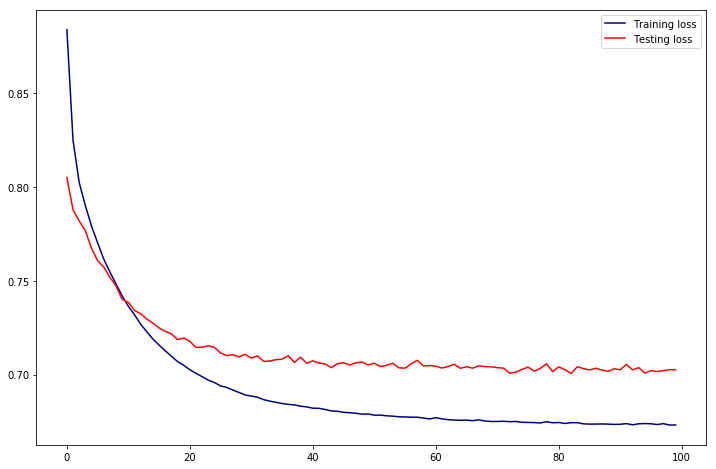

In [36]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize = (12, 8))
plt.plot(train_loss, label = 'Training loss', color = 'navy')
plt.plot(test_loss, label = 'Testing loss', color = 'Red')
plt.legend();

In [37]:
history.history['acc'][-1], history.history['val_acc'][-1]

(0.6188466949637261, 0.5704918042558138)

#### Regularization Method 2

In [38]:
model_dropout = Sequential()

n_input = X_train.shape[1]
n_hidden = n_input

model_dropout.add(Dense(n_hidden, input_dim = n_input, activation = 'relu'))
model_dropout.add(Dropout(0.5)) # refers to nodes in the first hidden layer
model_dropout.add(Dense(1, activation = 'sigmoid'))

model_dropout.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

history_dropout = model_dropout.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = None)

W0905 00:35:30.092208 4447454656 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 711 samples, validate on 305 samples
Epoch 1/100
711/711 [==============================] - 0s 571us/step - loss: 0.7190 - acc: 0.4880 - val_loss: 0.7065 - val_acc: 0.4820
Epoch 2/100
711/711 [==============================] - 0s 54us/step - loss: 0.7073 - acc: 0.5162 - val_loss: 0.7003 - val_acc: 0.5115
Epoch 3/100
711/711 [==============================] - 0s 50us/step - loss: 0.6955 - acc: 0.5485 - val_loss: 0.6960 - val_acc: 0.5344
Epoch 4/100
711/711 [==============================] - 0s 52us/step - loss: 0.6898 - acc: 0.5457 - val_loss: 0.6950 - val_acc: 0.5311
Epoch 5/100
711/711 [==============================] - 0s 50us/step - loss: 0.6889 - acc: 0.5556 - val_loss: 0.6937 - val_acc: 0.5213
Epoch 6/100
711/711 [==============================] - 0s 53us/step - loss: 0.6957 - acc: 0.5204 - val_loss: 0.6929 - val_acc: 0.5311
Epoch 7/100
711/711 [==============================] - 0s 50us/step - loss: 0.6948 - acc: 0.5302 - val_loss: 0.6914 - val_acc: 0.5410
Epoch 8/100
711

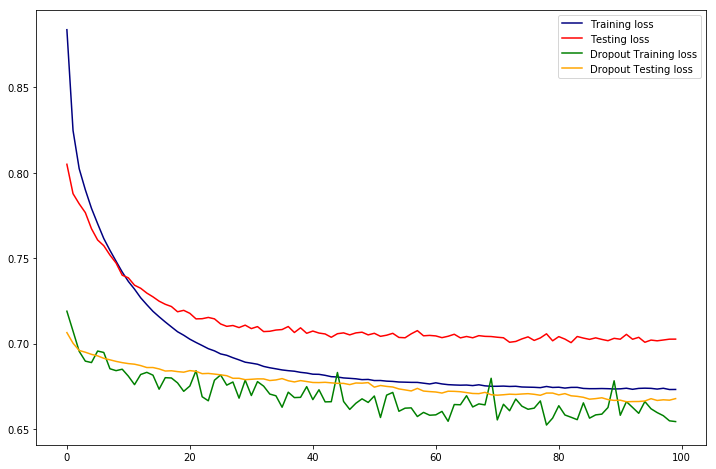

In [39]:
train_loss_dropout = history_dropout.history['loss']
test_loss_dropout = history_dropout.history['val_loss']
plt.figure(figsize = (12, 8))
plt.plot(train_loss, label = 'Training loss', color = 'navy')
plt.plot(test_loss, label = 'Testing loss', color = 'red')
plt.plot(train_loss_dropout, label = 'Dropout Training loss', color = 'green')
plt.plot(test_loss_dropout, label = 'Dropout Testing loss', color = 'orange')
plt.legend();

In [40]:
history_dropout.history['acc'][-1], history_dropout.history['val_acc'][-1]

(0.596343178873156, 0.593442623927945)